In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('predicted.csv')
print(df.shape)
print(df.isnull().sum())
df.head()

(88, 7)
case_date          0
confirmed          0
active             0
death              0
recovered          0
sentiment_date     0
sentiment_score    0
dtype: int64


,case_date,confirmed,active,death,recovered,sentiment_date,sentiment_score
0,01-02-2020,0,0,0,0,03-02-2020,-0.08755
1,02-02-2020,1,1,0,0,04-02-2020,-0.03909
2,03-02-2020,1,1,0,0,05-02-2020,-0.01901
3,04-02-2020,0,0,0,0,06-02-2020,-0.13306
4,05-02-2020,0,0,0,0,07-02-2020,-0.15122


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,[1,2,3,4]], df.iloc[:,[6]], test_size = 0.25,random_state=42)

In [ ]:
x_train.head()

,confirmed,active,death,recovered
40,10,9,1,0
28,0,0,0,0
9,0,0,0,0
66,573,471,27,75
5,0,0,0,0


In [ ]:
x_test.head()

,confirmed,active,death,recovered
76,922,611,38,273
0,0,0,0,0
26,0,0,0,0
22,0,0,0,0
12,0,-1,0,1


In [ ]:
y_train.head()

,sentiment_score
40,0.011858
28,-0.007560
9,-0.157080
66,0.144225
5,-0.032270


In [ ]:
y_test.head()

,sentiment_score
76,0.127952
0,-0.087550
26,-0.135100
22,-0.047570
12,-0.116590


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(66, 4)
(22, 4)
(66, 1)
(22, 1)


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grad=GradientBoostingRegressor(n_estimators=200,random_state=100,learning_rate=0.1,max_depth = 5,min_samples_leaf =3,min_samples_split = 12)
grad.fit(x_train,y_train)
y_pred=grad.predict(x_test)
y_tr=grad.predict(x_train)
print('mae test:',metrics.mean_absolute_error(y_test,y_pred))
print('mse test:',metrics.mean_squared_error(y_test,y_pred))
print('rmse test:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 test:',r2_score(y_pred,y_test))
print('mae train:',metrics.mean_absolute_error(y_train,y_tr))
print('mse train:',metrics.mean_squared_error(y_train,y_tr))
print('rmse train:',np.sqrt(metrics.mean_squared_error(y_train,y_tr)))
print('r2 train:',r2_score(y_train,y_tr))

mae test: 0.031215684080796304
mse test: 0.0024624417411601863
rmse test: 0.04962299609213642
r2 test: 0.8213747512350515
mae train: 0.026213238177026782
mse train: 0.0025134963516063305
rmse train: 0.05013478185458006
r2 train: 0.8149897026653126


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


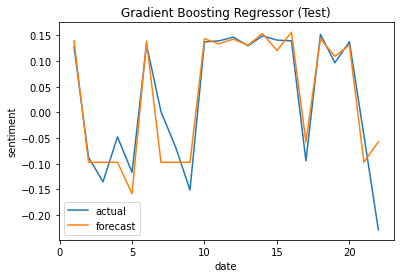

In [ ]:
x1=range(1,23)
y1 = y_test
plt.plot(x1, y1, label = "actual")
x2 = range(1,23)
y2 = y_pred
plt.plot(x2, y2, label = "forecast")
plt.xlabel('date')
plt.ylabel('sentiment')
plt.title('Gradient Boosting Regressor (Test)')
plt.legend()
plt.show()

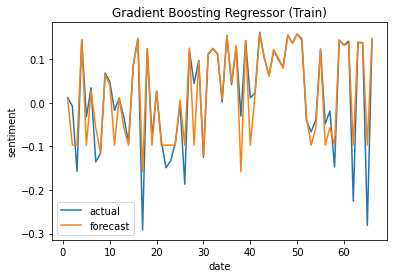

In [ ]:
x1=range(1,67)
y1 = y_train
plt.plot(x1, y1, label = "actual")

x2 = range(1,67)
y2 = y_tr
plt.plot(x2, y2, label = "forecast")
plt.xlabel('date')

plt.ylabel('sentiment')
plt.title('Gradient Boosting Regressor (Train)')
plt.legend()
plt.show()

In [ ]:
look=pd.read_csv('to_predict.csv')
print(look.shape)
print(look.isnull().sum())
look.head()

(65, 7)
case_date           0
confirmed           0
active              0
death               0
recovered           0
sentiment_date      0
sentiment_score    65
dtype: int64


,case_date,confirmed,active,death,recovered,sentiment_date,sentiment_score
0,30-01-2020,1,1,0,0,01-02-2020,NaN
1,31-01-2020,0,0,0,0,02-02-2020,NaN
2,29-04-2020,1705,944,71,690,01-05-2020,NaN
3,30-04-2020,1801,1096,75,630,02-05-2020,NaN
4,01-05-2020,2396,1357,77,962,03-05-2020,NaN


In [ ]:
prediction=grad.predict(look.iloc[:,[1,2,3,4]])

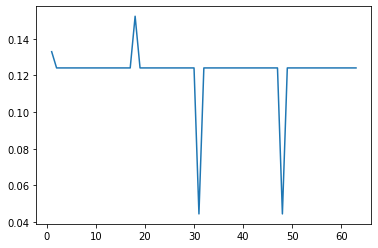

In [ ]:
x1=range(1,64)
y1 = prediction[2:]
plt.plot(x1, y1, label = "predicted")


In [ ]:
look['sentiment_score']=prediction
look.head()

,case_date,confirmed,active,death,recovered,sentiment_date,sentiment_score
0,30-01-2020,1,1,0,0,01-02-2020,-0.057125
1,31-01-2020,0,0,0,0,02-02-2020,-0.097140
2,29-04-2020,1705,944,71,690,01-05-2020,0.132995
3,30-04-2020,1801,1096,75,630,02-05-2020,0.124130
4,01-05-2020,2396,1357,77,962,03-05-2020,0.124130


In [ ]:
import joblib
joblib.dump(grad,'grad.sav')

['grad.sav']

In [ ]:
look.to_csv('predict-full.csv',index=False)